# Homework 6  - Logistic Regression without using any libraries. 

## Your Name Here

Student Name: Kevin Han

Student UT EID: kh38823

---

Partner Name: Christine Kim

Partner UT EID:

---

Date Created: 03/03/2024

Date Last Modified: 03/03/2024

---

Totoal Points 20. 



In [141]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# Your allowed to use only the above libraries that are imported. No other libs should be used in this assignment. 

## Heart Dataset 

In this Assignment we will work with some patients dataset. 

We have access to 303 patients data. The features are listed below. 

In [178]:
# Your code here
heart_df = pd.read_csv("Heart.csv")
heart_df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


**Age:** The person’s age in years

**Sex:** The person’s sex (1 = male, 0 = female)

**ChestPain:** chest pain type

* Value 0: asymptomatic
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: typical angina

**RestBP:** The person’s resting blood pressure (mm Hg on admission to the hospital)

**Chol:** The person’s cholesterol measurement in mg/dl

**Fbs:** The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
restecg: resting electrocardiographic results

* Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
* Value 1: normal
* Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

**RestECG:** The person’s maximum heart rate achieved

**MaxHR:** Exercise induced angina (1 = yes; 0 = no)

**Oldpeak:** ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)

**Slope:** the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping

* 0: downsloping; 
* 1: flat; 
* 2: upsloping

**Ca:** The number of major vessels (0–3)

**Thal:** A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously

* Value 1: fixed defect (no blood flow in some part of the heart)
* Value 2: normal blood flow
* Value 3: reversible defect (a blood flow is observed but it is not normal)

**Target:** Heart disease (1 = no, 0= yes)

# Task 1 - (4 points)
We want to use logistic regerssion to predict if a patient will have heart problems or not. The column "Target" in our datasets includes data about heart disease. If the patient had heart disease, the patient's "Target" value equals 1. Otherwise, "Target" equals 0.

Prepare your data set for predicting heart disease ("Target" column) by using 3 features:

* Age of the patient (Column **"Age"**)
* Gender of the patient (male or female - Column **"Sex"**)
* Cholestrol level of the patient (Column **"Chol"**) 

Split your data into 80% traning data and 20% test data ***without*** using any libraries other than the ones imported above. You must do it manually.

* Do a maximum of **100 iterations**
* Use a very small learning rate for checking your GD implementation. 
* Your are allowed to use your choice of learning rate, like using 0.0001, 0.001 or 0.01 or 0.1 or higher/lower. 
* **Visualize your error/costs over the iterations with a plot**.
* No need to add an y-intercept in this task. 

(**4 points** - 3 points for code, 1 point for cost visualization)

In [179]:
# hot encode
heart_df['Target'] = heart_df['Target'].map({'No': 0, 'Yes': 1})


In [185]:
# randomize and split dataset
#heart_df = heart_df.sample(frac=1, random_state = 0)
trainingLen = int(len(heart_df) * 0.8)
trainingData = heart_df.loc[:trainingLen, ['Age', 'Sex', 'Chol', 'Target']].to_numpy()
testingData = heart_df.loc[trainingLen:, ['Age', 'Sex', 'Chol', 'Target']].to_numpy()
independentTraining = trainingData[:, :3]
independentTesting = testingData[:, :3]
dependentTraining = trainingData[:, 3]
dependentTesting = testingData[:, 3]


# define functions
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

def cost_function(X, y, weights):
    m, n = X.shape
    x_dot_weights = X.dot(weights)
    cost = 1.0 / m * (-y.T.dot(np.log(sigmoid(x_dot_weights))) - (1 - y).T.dot(np.log(1 - sigmoid(x_dot_weights))))
    return cost

def gradient(X, y, weights):
    m, n = X.shape
    x_dot_weights = X.dot(weights)

    grad = (1.0 / m )* (sigmoid(x_dot_weights) - y).T.dot(X)

    return grad


# Set up hyperparams
weights = np.zeros(3)
learningRate = 0.000001
max_iter = 100
cost_list = []
iters= []

for i in range(max_iter):

    iters.append(i)
    cost = cost_function(independentTraining, dependentTraining, weights)
    if i%5 == 0:
        print("Epoch " + str(i) + " cost:", cost)
    cost_list.append(cost)
    
    grad = gradient(independentTraining, dependentTraining, weights)
    
    weights = weights - learningRate * grad    


Epoch 0 cost: 0.6931471805599454
Epoch 5 cost: 0.6924461689582418
Epoch 10 cost: 0.6918565972595484
Epoch 15 cost: 0.6913607115689807
Epoch 20 cost: 0.690943582176519
Epoch 25 cost: 0.6905926575961873
Epoch 30 cost: 0.6902973875852382
Epoch 35 cost: 0.6900489050117118
Epoch 40 cost: 0.6898397577370317
Epoch 45 cost: 0.6896636828797456
Epoch 50 cost: 0.6895154169078173
Epoch 55 cost: 0.6893905359647116
Epoch 60 cost: 0.6892853216720353
Epoch 65 cost: 0.6891966483767128
Epoch 70 cost: 0.689121888433932
Epoch 75 cost: 0.6890588326496843
Epoch 80 cost: 0.6890056234597677
Epoch 85 cost: 0.6889606988061708
Epoch 90 cost: 0.6889227449964479
Epoch 95 cost: 0.6888906571056077


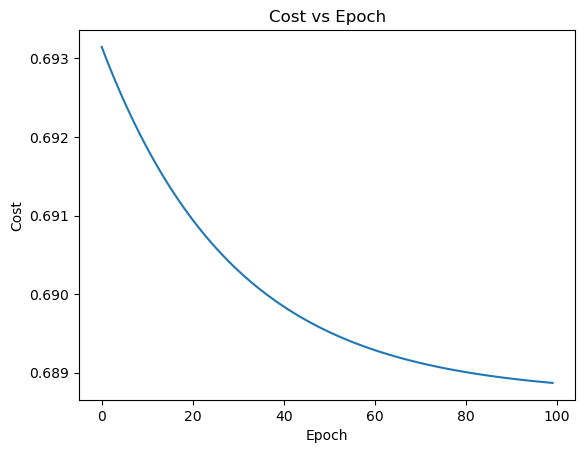

In [186]:
plt.plot(iters, cost_list)
plt.title('Cost vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

# Task 2 - (4 points)

Cacluate the Accuracy, Precision, Recall and F1 score of your logistic regression implementaion on the testing set. 
Print the results. 

You may use equations shown in lecture/slides/examples.

Calcuate the accuracy, precision, recall and F1 score of your logistic regression implementaion on the testing set. 
Print the results. (**4 points**)


In [187]:
# Define functions
def predict(weights, X):
    p = sigmoid(X.dot(weights)) >= 0.5
    return p.astype(int)

# Calculate
predictions = predict(weights, independentTesting)
correct = np.sum(predictions == dependentTesting)
TP = np.sum((predictions == 1) & (dependentTesting == 1))
FP = np.sum((predictions == 1) & (dependentTesting == 0))
TN = np.sum((predictions == 0) & (dependentTesting == 0))
FN = np.sum((predictions == 0) & (dependentTesting == 1))

precision = TP/(TP + FP)
recall = TP/(TP + FN)

print("Predictions:", predictions)
print("Accuracy is: ", correct/dependentTesting.size)
print("Precision is: ", precision)
print("F1 Score: ", 2*(precision*recall)/(precision+recall))

Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy is:  0.47540983606557374
Precision is:  nan
F1 Score:  nan


/var/folders/j0/5btyzqtd1p918nx0wqtnrpcr0000gn/T/ipykernel_7389/1499599773.py:14: RuntimeWarning: invalid value encountered in scalar divide
  precision = TP/(TP + FP)


# Task 3 - (4 points)

Add a y-intercept and repeat the above tasks. Do you see any differences after adding the y-intercept?

(4 points - 2 for code, 1 for cost visualizaiton, 1 for description.)

In [188]:
weights2 = np.zeros(4)
newIndependentTraining =  np.column_stack((np.ones_like(dependentTraining), independentTraining))
newIndependentTesting = np.column_stack((np.ones_like(dependentTesting), independentTesting))
# Set up hyperparams
learningRate = 0.00001
max_iter = 100
cost_list = []
iters= []

for i in range(max_iter):

    iters.append(i)
    cost = cost_function(newIndependentTraining, dependentTraining, weights2)
    if i%5 == 0:
        print("Epoch " + str(i) + " cost:", cost)
    cost_list.append(cost)
    
    grad = gradient(newIndependentTraining, dependentTraining, weights2)
    
    weights2 = weights2 - learningRate * grad 



Epoch 0 cost: 0.6931471805599454
Epoch 5 cost: 0.68940552677893
Epoch 10 cost: 0.6888270847006852
Epoch 15 cost: 0.6887306538546627
Epoch 20 cost: 0.6887083369070436
Epoch 25 cost: 0.6886974920077635
Epoch 30 cost: 0.6886884474073186
Epoch 35 cost: 0.6886797062091503
Epoch 40 cost: 0.6886710364420563
Epoch 45 cost: 0.6886624020736845
Epoch 50 cost: 0.688653797436496
Epoch 55 cost: 0.6886452215696728
Epoch 60 cost: 0.6886366742422401
Epoch 65 cost: 0.6886281553366261
Epoch 70 cost: 0.6886196647531114
Epoch 75 cost: 0.6886112023950177
Epoch 80 cost: 0.688602768166413
Epoch 85 cost: 0.6885943619717544
Epoch 90 cost: 0.6885859837158336
Epoch 95 cost: 0.6885776333037663


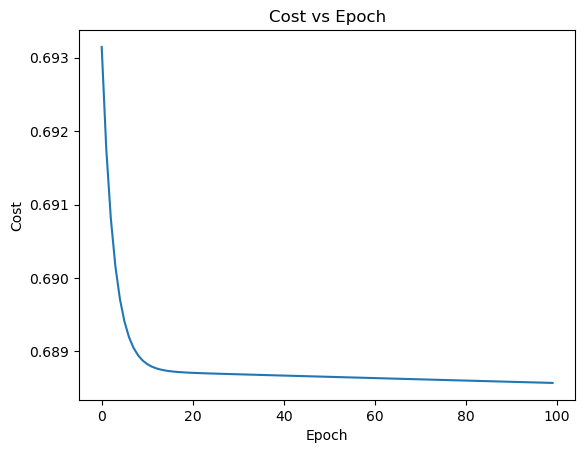

In [189]:
plt.plot(iters, cost_list)
plt.title('Cost vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

In [190]:
# Calculate
predictions = predict(weights2, newIndependentTesting)
correct = np.sum(predictions == dependentTesting)
TP = np.sum((predictions == 1) & (dependentTesting == 1))
FP = np.sum((predictions == 1) & (dependentTesting == 0))
TN = np.sum((predictions == 0) & (dependentTesting == 0))
FN = np.sum((predictions == 0) & (dependentTesting == 1))

precision = TP/(TP + FP)
recall = TP/(TP + FN)

print("Accuracy is: ", correct/dependentTesting.size)
print("Precision is: ", precision)
print("F1 Score: ", 2*(precision*recall)/(precision+recall))
print('Y-Intercept: ', weights2[0])

Accuracy is:  0.47540983606557374
Precision is:  nan
F1 Score:  nan
Y-Intercept:  -1.6437894610681818e-05


/var/folders/j0/5btyzqtd1p918nx0wqtnrpcr0000gn/T/ipykernel_7389/927029569.py:9: RuntimeWarning: invalid value encountered in scalar divide
  precision = TP/(TP + FP)


Adding a y-intercept did not really change anything. The accuracy stayed around the same as well as the precision and F1-Score. However, I think this is due more to chance rather than adding a y-intercept. This is because the optimal y-intercept appears to be approximately zero.

The precision and F1 score are nan's because my model is literally predicting all negatives, so since precision is nan due to zero denominator, so is F1 score since it's a function of p recision. 

# Task 4 - Implement the Bold Driver   - (4 points)

Implement the bold driver into your gradient descent implementation, which lets us have a dynamic learning rate. Visualize the costs and print the accuracy/etc. metrics as before. Do not use a y-intercept this time.

Add a stop condition that stop the GD when the cost is not changing more than 0.001 between iterations. 
Describe the results. Did you stop earlier than 100 iterations?
(4 points - 2 for code, 1 for cost visualizaiton, 1 for description.)



In [197]:
# Set up hyperparams
weights3 = np.zeros(3)
learningRate = 0.001
cost_list = []
i = 0
iters= []
dontStop = True

while dontStop:
    if i > 0:
        prevCost = cost
    iters.append(i)
    cost = cost_function(independentTraining, dependentTraining, weights3)
    if i > 0:
        if cost < prevCost:
            learningRate *= 1.05
        else:
            learningRate *= .5
    print("Epoch " + str(i) + " cost:", cost)
    cost_list.append(cost)
    
    grad = gradient(independentTraining, dependentTraining, weights3)
    
    weights3 = weights3 - learningRate * grad 

    if i > 0 and abs(prevCost - cost) <= 0.001:
        dontStop = False
    i += 1



Epoch 0 cost: 0.6931471805599454
Epoch 1 cost: 1.4777307508607385
Epoch 2 cost: 5.683973075589877
Epoch 3 cost: 0.9661224736407285
Epoch 4 cost: 2.1017650143551787
Epoch 5 cost: 0.7348854193130894
Epoch 6 cost: 0.7564026671794778
Epoch 7 cost: 0.6899836349937141
Epoch 8 cost: 0.6883669167456673
Epoch 9 cost: 0.6882804939467485


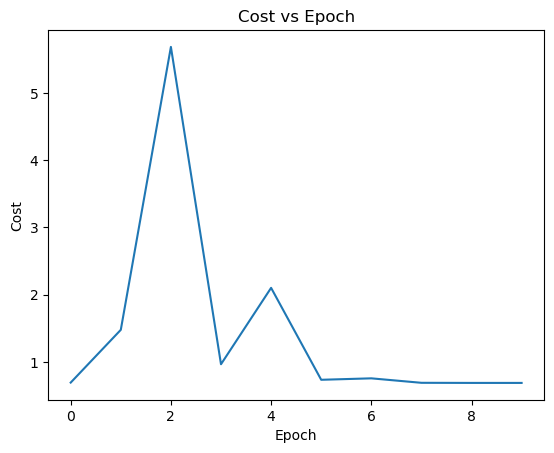

In [198]:
plt.plot(iters, cost_list)
plt.title('Cost vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

Stopped way earlier than 100 iterations, but the cost was a little worse. However, we could've set a stricter stopping criteria and it could've yielded better results at the expense of computation. 

In [193]:
# Calculate
def predict(weights, X):
    p = sigmoid(X.dot(weights)) >= 0.5
    return p.astype(int)

predictions = predict(weights3, independentTesting)
correct = np.sum(predictions == dependentTesting)
TP = np.sum((predictions == 1) & (dependentTesting == 1))
FP = np.sum((predictions == 1) & (dependentTesting == 0))
TN = np.sum((predictions == 0) & (dependentTesting == 0))
FN = np.sum((predictions == 0) & (dependentTesting == 1))

precision = TP/(TP + FP)
recall = TP/(TP + FN)
print("Predictions: ", predictions)
print("Accuracy is: ", correct/dependentTesting.size)
print("Precision is: ", precision)
print("F1 Score: ", 2*(precision*recall)/(precision+recall))

Predictions:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy is:  0.47540983606557374
Precision is:  nan
F1 Score:  nan


/var/folders/j0/5btyzqtd1p918nx0wqtnrpcr0000gn/T/ipykernel_7389/3527504735.py:13: RuntimeWarning: invalid value encountered in scalar divide
  precision = TP/(TP + FP)


Our model stayed around the same accuracy, precision, and F1 scores once again. (Made the exact same predictions).

# Task 5 - Implement the L2 norm regularization.  - (4 points)



Modify your Cost and gradient to implement the l2 norm regularization. Repeat the steps taken in prior tasks and describe your result.

 * Use a y-intercept.
 * Do a maximum of 100 iterations as before and report your accuracy, precision, recall and F1 score.
 * Optional: You can stop earlier, if the cost is not changing more than 0.001 between iterations.
 * Optional: You can use the bold driver, if you want. But a bold driver is not required to perform L2 norm regularizaiton.

(4 points - 2 for code, 1 for cost visualizaiton, 1 for description.)

In [194]:
# Define ridge
def ridge(penalty, weights):
    # derivative of regularization w.r.t. any weight is just 2*weight since all other terms have no dependence
    return penalty * weights

# Set hyperparams
weights4 = np.zeros(4)
max_iter = 100
learningRate = 0.0001
penaltyAmp = 4
cost_list = []
iters = []

# Run gradient descent
for i in range(max_iter):

    iters.append(i)
    cost = cost_function(newIndependentTraining, dependentTraining, weights4)
    if i%5 == 0:
        print("Epoch " + str(i) + " cost:", cost)
    cost_list.append(cost)
    
    grad = gradient(newIndependentTraining, dependentTraining, weights4)
    
    weights4 = weights4 - learningRate * (grad + ridge(penaltyAmp, weights4)) 

Epoch 0 cost: 0.6931471805599454
Epoch 5 cost: 0.6887791609918356
Epoch 10 cost: 0.6885729060202918
Epoch 15 cost: 0.6884879058597315
Epoch 20 cost: 0.6884091915268714
Epoch 25 cost: 0.6883332768573297
Epoch 30 cost: 0.6882599851978464
Epoch 35 cost: 0.688189216400413
Epoch 40 cost: 0.6881208795648437
Epoch 45 cost: 0.6880548866955561
Epoch 50 cost: 0.6879911531255452
Epoch 55 cost: 0.6879295972906097
Epoch 60 cost: 0.687870140631847
Epoch 65 cost: 0.687812707481824
Epoch 70 cost: 0.6877572249581989
Epoch 75 cost: 0.6877036228606348
Epoch 80 cost: 0.6876518335715505
Epoch 85 cost: 0.6876017919604669
Epoch 90 cost: 0.6875534352918499
Epoch 95 cost: 0.6875067031363197


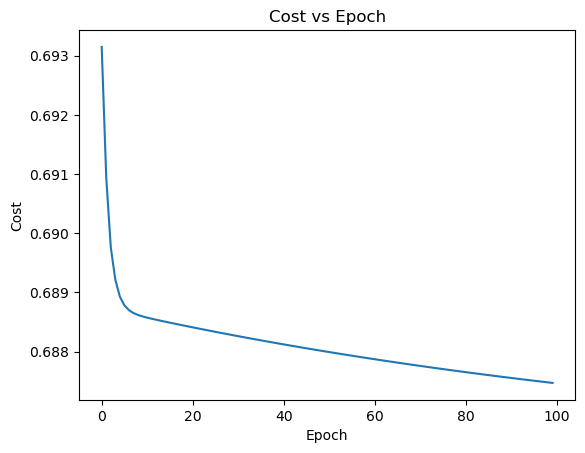

In [195]:
plt.plot(iters, cost_list)
plt.title('Cost vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

In [196]:
def predict(weights, X):
    p = sigmoid(X.dot(weights)) >= 0.5
    return p.astype(int)

predictions = predict(weights4, newIndependentTesting)
correct = np.sum(predictions == dependentTesting)
TP = np.sum((predictions == 1) & (dependentTesting == 1))
FP = np.sum((predictions == 1) & (dependentTesting == 0))
TN = np.sum((predictions == 0) & (dependentTesting == 0))
FN = np.sum((predictions == 0) & (dependentTesting == 1))

precision = TP/(TP + FP)
recall = TP/(TP + FN)
print("Predictions: ", predictions)
print("Accuracy is: ", correct/dependentTesting.size)
print("Precision is: ", precision)
print("F1 Score: ", 2*(precision*recall)/(precision+recall))
print('Y-Intercept: ', weights4[0])

Predictions:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
Accuracy is:  0.47540983606557374
Precision is:  0.5
F1 Score:  0.058823529411764705
Y-Intercept:  -0.0001436688696878586


Accuracy stayed around the same, BUT we did make some different predictions with the regularizer. We now predicted some positives, leading to an actualy precision and F1 score. Out of all positive predictions, we predicted 50% of them correctly. However, our F1 score was very low. Our y-intercept was some magnitudes larger than in Q3, but still approximately zero. 